Got an accuracy of of 0.9179 on test set
Model Architechure:
Convolution((2,2),32) -> MaxPool((2,2),padding=same) , Dropout=0.3-> Convolution((2,2),64) -> MaxPool((2,2),padding=same), Dropout=0.3 -> DenseLayer , Dropout(0.5) -> output

In [96]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [97]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [98]:
print(x_train.shape)

(60000, 28, 28)


In [99]:
print(y_train.shape)

(60000,)


Therefore we can see that there are 60000 images in training set

In [100]:
print(x_test.shape)

(10000, 28, 28)


In [101]:
print(y_test.shape)

(10000,)


Therefore there are 10000 images in test set

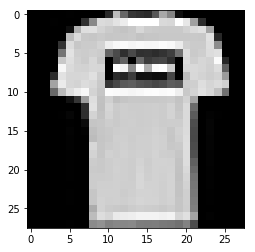

In [102]:
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))

/home/pankaj/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


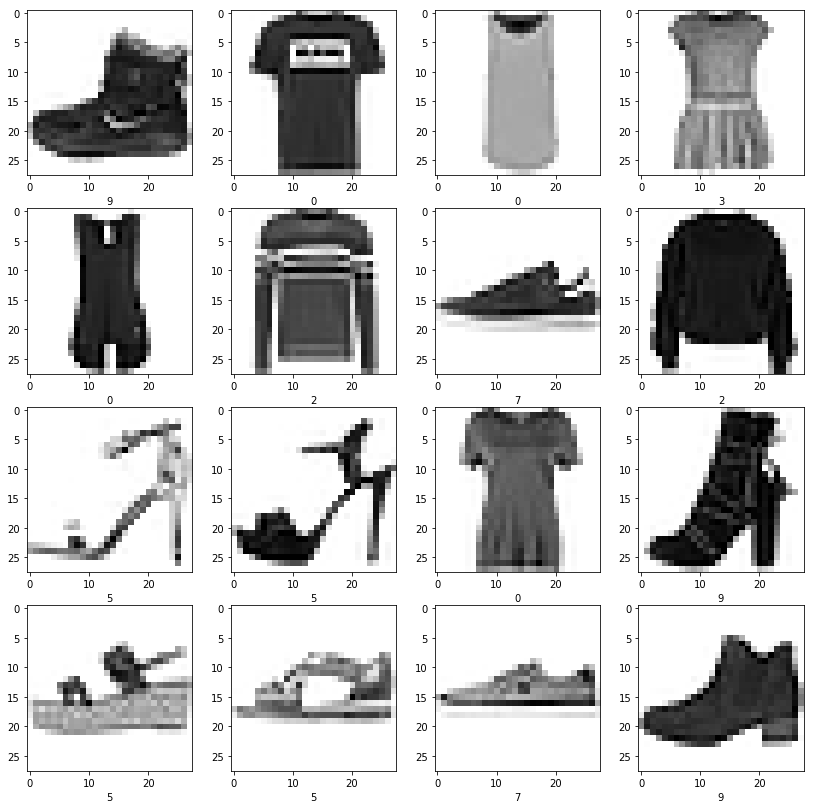

In [103]:
%matplotlib inline

plt.figure(figsize=(14,14))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.grid('off')
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])


In [104]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Using sequential model API for prdiction

In [105]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
__________

In [106]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [107]:
import keras

x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [108]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_train, y_train),
         )

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.5388 - acc: 0.8033 - val_loss: 0.3553 - val_acc: 0.8715
Epoch 2/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3769 - acc: 0.8623 - val_loss: 0.2960 - val_acc: 0.8905
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.3315 - acc: 0.8796 - val_loss: 0.2638 - val_acc: 0.9033
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.3068 - acc: 0.8873 - val_loss: 0.2344 - val_acc: 0.9152
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2860 - acc: 0.8950 - val_loss: 0.2228 - val_acc: 0.9174
Epoch 6/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2694 - acc: 0.9004 - val_loss: 0.2055 - val_acc: 0.9236
Epoch 7/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2600 - acc: 0.9052 - val_loss: 0.1894 - val_acc

In [109]:
_,score = model.evaluate(x_test, y_test, verbose=0)
print(score)

0.9179
